# Purpose
* 최종적으로 사기거래 여부를 예측하기 위한 데이터 만들기
* fraud.csv : 신용카드 이상감지 모델을 만들기 위한 데이터이며, is_fraud가 사기거래 여부를 나타내는 변수입니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fraud = pd.read_csv('~/data/fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


## 생각 )
1) 거리 : 사용자와 상인의 latitude, longtitude 활용하여 너무 멀리 있을 경우 사기 확률 올라갈 수 있다  
2) 필요없는 자료 : name, street, state, zip, trans_num, unix_time  
3) city pop, city : 도시별 사기꾼 확률이 필요가 있을까?   
4) cc num, first/last name 일치할 경우 이름을 제거해도 괜찮겠다  
5) gender는 사기여부에 별 영향이 없을 것 같은데 일단 보자
  
결론 : 필요한 정보 ['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'city', 'city_pop', 'lat', 'long', 'dob', 'merch_lat', 'march_long', 'is_fraud']

# 1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거

In [5]:
#결측치가 하나도 없다

fraud.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
#과도한 주소정보, 거래정보를 제거한다

fraud.drop(['street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [7]:
# 이름은 합쳐서 한 번 cc_num이랑 중복 여부 확인해본다

fraud['name'] = fraud['first'] + " "+ fraud['last']

In [8]:
fraud[fraud['name']=='Gina Grimes']['cc_num'].value_counts()

6538441737335434    4392
Name: cc_num, dtype: int64

### 💡 이름별로 신용카드 정보 하나만 있나 확인

In [9]:
fraud['name'].nunique()

124

In [10]:
fraud.groupby(['name', 'cc_num']).nunique()

,,trans_date_trans_time,merchant,category,amt,first,last,gender,city,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
name,cc_num,,,,,,,,,,,,,,,,
Adam Santos,213156747557083,3648,681,14,2920,1,1,1,1,1,1,1,1,1,3645,3646,2
Allison Allen,6011438889172900,4385,685,14,3761,1,1,1,1,1,1,1,1,1,4380,4382,2
Allison Ayala,30044330818990,3650,674,14,3200,1,1,1,1,1,1,1,1,1,3646,3649,2
Amber Lewis,4587657402165341815,4373,686,14,3679,1,1,1,1,1,1,1,1,1,4367,4367,2
Ana Howell,213112402583773,4380,682,14,3315,1,1,1,1,1,1,1,1,1,4377,4376,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyler Wright,340953839692349,3648,685,14,2904,1,1,1,1,1,1,1,1,1,3642,3644,2
Valerie Davis,6011104316292105,3641,678,14,2828,1,1,1,1,1,1,1,1,1,3636,3637,2
Vicki Mendoza,676372984911,3649,670,14,2893,1,1,1,1,1,1,1,1,1,3648,3647,2


In [11]:
#이름정보, 신용카드 번호 정보도 삭제한다

fraud.drop(['first','last','name', 'cc_num'],axis=1, inplace=True)

In [12]:
# 그냥 필요한 자료로만 표를 만든다
fraud_df = fraud[['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'city', 'city_pop', 'lat', 'long', 'dob', 'merch_lat', 'merch_long', 'is_fraud']]

In [13]:
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,gender,city,city_pop,lat,long,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0


In [14]:
fraud_df.describe()

,amt,city_pop,lat,long,merch_lat,merch_long,is_fraud
count,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,69.050120,1.213922e+05,37.931230,-90.495619,37.930272,-90.495411,0.002533
std,160.322867,3.725751e+05,5.341193,12.990732,5.372986,13.004100,0.050264
min,1.000000,4.600000e+01,24.655700,-122.345600,23.655789,-123.345106,0.000000
25%,8.960000,1.228000e+03,33.746700,-97.235100,33.781388,-96.984814,0.000000
50%,42.170000,5.760000e+03,38.507200,-87.591700,38.545124,-87.573441,0.000000
75%,80.330000,5.083500e+04,41.520500,-80.731000,41.624294,-80.685567,0.000000
max,25086.940000,2.906700e+06,48.887800,-69.965600,49.887523,-68.965624,1.000000


# 2. 최소 2개 이상의 새로운 피처(변수)를 생성
* 구매 금액, 시간 등의 변수를 이용

## 1) 구매시간이 야간인지 판별 (00~6시)하는 'is_night' 열 생성

In [15]:
import datetime

In [16]:
def get_time_from_trans_date_trans_time(dt):
    return dt.split(' ')[1]

fraud_df['time'] = fraud_df['trans_date_trans_time'].apply(get_time_from_trans_date_trans_time)

In [17]:
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,gender,city,city_pop,lat,long,dob,merch_lat,merch_long,is_fraud,time
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,00:00:44
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,00:12:34
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,00:17:16
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,00:20:15
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,00:23:41


In [18]:
fraud_df.drop('trans_date_trans_time', axis=1)

,merchant,category,amt,gender,city,city_pop,lat,long,dob,merch_lat,merch_long,is_fraud,time
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,00:00:44
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,00:12:34
2,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,00:17:16
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,00:20:15
4,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,00:23:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,Wilmington,186140,34.2651,-77.8670,1983-02-08,34.853497,-78.664158,0,23:56:48
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,1523,34.0326,-82.2027,1984-06-03,35.008839,-81.475156,0,23:56:57
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,28739,29.0393,-95.4401,1999-12-27,29.661049,-96.186633,0,23:59:09
491132,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,3684,46.1966,-118.9017,1981-11-29,46.658340,-119.715054,0,23:59:15


In [19]:
def is_night(time):
    t = time.split(':')[0]
    hour = int(t)
    return hour >= 0 and int(t) < 7


fraud_df['is_night'] = fraud_df['time'].apply(is_night)

In [20]:
fraud_df['is_night'] = fraud_df['is_night'].replace({True:1, False:0})

In [21]:
fraud_df

,trans_date_trans_time,merchant,category,amt,gender,city,city_pop,lat,long,dob,merch_lat,merch_long,is_fraud,time,is_night
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,00:00:44,1
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,00:12:34,1
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,00:17:16,1
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,00:20:15,1
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,00:23:41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,fraud_Botsford and Sons,home,134.26,F,Wilmington,186140,34.2651,-77.8670,1983-02-08,34.853497,-78.664158,0,23:56:48,0
491130,2020-12-31 23:56:57,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,1523,34.0326,-82.2027,1984-06-03,35.008839,-81.475156,0,23:56:57,0
491131,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,28739,29.0393,-95.4401,1999-12-27,29.661049,-96.186633,0,23:59:09,0
491132,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,3684,46.1966,-118.9017,1981-11-29,46.658340,-119.715054,0,23:59:15,0


In [22]:
fraud_df.drop(['trans_date_trans_time', 'time'], axis=1, inplace=True)

## 2) 구매금액이 일정액 이상인지 판별

In [23]:
fraud_df['amt'].sort_values(ascending=True)

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491134, dtype: float64

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

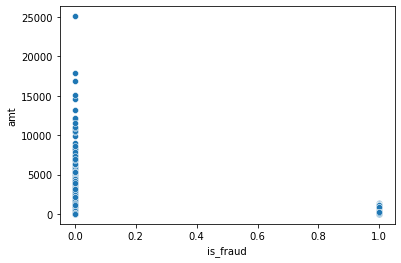

In [24]:
sns.scatterplot(x=fraud_df['is_fraud'],y=fraud_df['amt'])

### 💡 거래 금액이 많다고 사기인 건 아닌가보다

## 3) 생년월일 중에서는 생년만 필요하다 

In [25]:
year = []

for i in range(len(fraud_df)):
    year.append(str(fraud_df['dob'][i]).split('-')[0])
    
fraud_df.drop('dob', axis=1, inplace=True)
fraud_df['birth_year'] = year

In [26]:
fraud_df.head()

,merchant,category,amt,gender,city,city_pop,lat,long,merch_lat,merch_long,is_fraud,is_night,birth_year
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,48.8878,-118.2105,49.159047,-118.186462,0,1,1978
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,40.6747,-74.2239,40.079588,-74.848087,0,1,1980
2,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,40.6152,-74.4150,40.021888,-74.228188,0,1,1974
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,42.2203,-83.3583,42.360426,-83.552316,0,1,1971
4,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,30.4066,-91.1468,29.737426,-90.853194,0,1,1977


In [27]:
fraud_df['birth_year'] = fraud_df['birth_year'].astype(int)

In [28]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    491134 non-null  object 
 1   category    491134 non-null  object 
 2   amt         491134 non-null  float64
 3   gender      491134 non-null  object 
 4   city        491134 non-null  object 
 5   city_pop    491134 non-null  int64  
 6   lat         491134 non-null  float64
 7   long        491134 non-null  float64
 8   merch_lat   491134 non-null  float64
 9   merch_long  491134 non-null  float64
 10  is_fraud    491134 non-null  int64  
 11  is_night    491134 non-null  int64  
 12  birth_year  491134 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 48.7+ MB


# 3. 데이터의 위도/경도 정보를 활용

* 구매자와 판매자의 lat, long의 차이의 절댓값이 평균적으로 얼마나 나는지 확인한다

In [29]:
fraud_df['lat_diff'] = abs(fraud_df['lat']-fraud_df['merch_lat'])
fraud_df.drop(['lat', 'merch_lat'], axis=1, inplace=True)

In [30]:
fraud_df['long_diff'] = abs(fraud_df['long']-fraud_df['merch_long'])
fraud_df.drop(['long', 'merch_long'], axis=1, inplace=True)

In [31]:
fraud_df

,merchant,category,amt,gender,city,city_pop,is_fraud,is_night,birth_year,lat_diff,long_diff
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,0,1,1978,0.271247,0.024038
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,0,1,1980,0.595112,0.624187
2,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,0,1,1974,0.593312,0.186812
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,0,1,1971,0.140126,0.194016
4,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,0,1,1977,0.669174,0.293606
...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,Wilmington,186140,0,0,1983,0.588397,0.797158
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,1523,0,0,1984,0.976239,0.727544
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,28739,0,0,1999,0.621749,0.746533
491132,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,3684,0,0,1981,0.461740,0.813354


In [32]:
fraud_df

,merchant,category,amt,gender,city,city_pop,is_fraud,is_night,birth_year,lat_diff,long_diff
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,0,1,1978,0.271247,0.024038
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,0,1,1980,0.595112,0.624187
2,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,0,1,1974,0.593312,0.186812
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,0,1,1971,0.140126,0.194016
4,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,0,1,1977,0.669174,0.293606
...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,Wilmington,186140,0,0,1983,0.588397,0.797158
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,1523,0,0,1984,0.976239,0.727544
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,28739,0,0,1999,0.621749,0.746533
491132,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,3684,0,0,1981,0.461740,0.813354


# 4. 통계적 관점으로 접근하여 유용한 변수를 만들기
1) 나이가 많을수록? (dob)  
2) 인구 수가 적은 도시일수록? (city_pop)  
3) 여성일수록/ 남성일수록? (gender)


## 1) 나이 정보 변수 생성

In [33]:
import datetime as dt

In [34]:
x = dt.datetime.now()
x.year

2024

In [35]:
fraud_df['Age'] = x.year - fraud_df['birth_year']
fraud_df.drop('birth_year', axis=1, inplace=True)

In [36]:
fraud_df

,merchant,category,amt,gender,city,city_pop,is_fraud,is_night,lat_diff,long_diff,Age
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,0,1,0.271247,0.024038,46
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,124967,0,1,0.595112,0.624187,44
2,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,71485,0,1,0.593312,0.186812,50
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,31515,0,1,0.140126,0.194016,53
4,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,378909,0,1,0.669174,0.293606,47
...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,Wilmington,186140,0,0,0.588397,0.797158,41
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,1523,0,0,0.976239,0.727544,40
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,28739,0,0,0.621749,0.746533,25
491132,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,3684,0,0,0.461740,0.813354,43


<AxesSubplot:xlabel='Age', ylabel='is_fraud'>

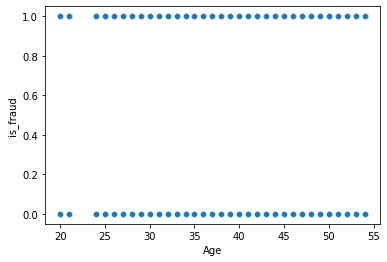

In [37]:
sns.scatterplot(x=fraud_df['Age'], y=fraud_df['is_fraud'])

## 회고) 

잘한점 : 데이터 Transformation, cleaning 배운 기법을 활용하여 잘 데이터를 정제했다. 여러가지 변수를 만들어보았다. 시각화도 해서 변수간 상관관계를 확인해보았다

부족한 점 : 아직 one-hot encoding이나 heatmap 시각화등이 부족하다.

개선할 점 : feature engineering에서 어떤 feature가 중요할 것인지와, 더 추가적인 변수 만드는 방법 등을 추가적으로 공부해야겠다